## Here we look how well our models perform on a different dataset and vice-versa

In [17]:
import pickle


model_folder = "../Language Model-Results/"

#!pip3 install latex


AUC:0.6475921521997622
AUC:0.7852259215219977
AUC:0.9510632401108592
AUC:0.6783446712018142


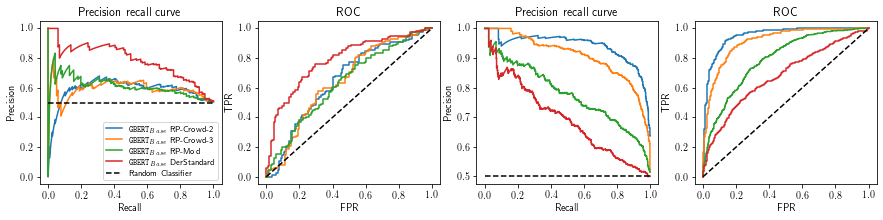

In [34]:
from sklearn import metrics
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

from matplotlib import rc
rc('text', usetex=True)
## in this section we cross-evaluate model performances on DERSTANDARD dataset

## load eval results
derstandard_derstandard = pickle.load( open( model_folder +"gbert-base-double-head-unfrozen-derstandard-folds-a0.9_best.pickle", "rb" ) )
derstandard_mod = pickle.load( open( model_folder + "cross_eval_gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_on_derstandard.pickle", "rb" ) )
derstandard_min3 = pickle.load( open( model_folder + "cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_on_derstandard.pickle", "rb" ) )
derstandard_min2 = pickle.load( open( model_folder +"cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-2-folds-a0.9_on_derstandard.pickle", "rb" ) )



## Here we create the PRC/AUC for our cross-evaluation

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1 ,4, figsize=(15,3))

probs_min3 = [x[1] for x in derstandard_min3["probs"]]
probs_min2 = [x[1] for x in derstandard_min2["probs"]]
probs_mod = [x[1] for x in derstandard_mod["probs"]]
probs_derstandard = [x[1] for x in derstandard_derstandard["probs"]]

## precision recall
lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(derstandard_min2["y_trues"],probs_min2)
ax1.plot(lr_recall, lr_precision, label='Bla')

lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(derstandard_min3["y_trues"],probs_min3)
ax1.plot(lr_recall, lr_precision, label='Bla')


lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(derstandard_mod["y_trues"],probs_mod)
ax1.plot(lr_recall, lr_precision, label='Bla')


lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(derstandard_derstandard["y_trues"],probs_derstandard)
ax1.plot(lr_recall, lr_precision, label='Bla')
ax1.plot([0, 1], [0.5, 0.5], color='black', linestyle='--',label="Baseline")

## AUC

fpr, tpr, thresholds = sklearn.metrics.roc_curve(derstandard_min2["y_trues"], probs_min2)
print("AUC:" + str(metrics.auc(fpr, tpr)))
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')


fpr, tpr, thresholds = sklearn.metrics.roc_curve(derstandard_min3["y_trues"], probs_min3)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')


fpr, tpr, thresholds = sklearn.metrics.roc_curve(derstandard_min3["y_trues"], probs_mod)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')

probs = [x[1] for x in derstandard_derstandard["probs"]]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(derstandard_derstandard["y_trues"], probs_derstandard)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')

print("AUC:" + str(metrics.auc(fpr, tpr)))




ax2.plot([0, 1], [0, 1], color='black', linestyle='--')

ax1.legend(["\\texttt{GBERT}$_{Base}$ RP-Crowd-2","\\texttt{GBERT}$_{Base}$ RP-Crowd-3","\\texttt{GBERT}$_{Base}$ RP-Mod","$\\texttt{GBERT}_{Base}$ DerStandard","Random Classifier"],fontsize=8)
ax1.set_title("Precision recall curve")
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')


ax2.set_title("ROC")
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')


## in this section we cross-evaluate model performances on RP-3 dataset

RP3_min3 = pickle.load( open( model_folder + "gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_best.pickle", "rb" ) )
RP3_min2 = pickle.load( open( model_folder +"cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-2-folds-a0.9_on_RP-Crowd-3.pickle", "rb" ) )
RP3_mod  = pickle.load( open( model_folder + "cross_eval_gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_on_RP-Crowd-3.pickle", "rb" ) )
RP3_derstandard = pickle.load( open( model_folder +"cross_eval_gbert-base-double-head-unfrozen-derstandard-folds-a0.9_on_RP-Crowd-3.pickle", "rb" ) )


probs_min3 = [x[1] for x in RP3_min3["probs"]]
probs_min2 = [x[1] for x in RP3_min2["probs"]]
probs_mod = [x[1] for x in RP3_mod["probs"]]
probs_derstandard = [x[1] for x in RP3_derstandard["probs"]]

## precision recall
lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(RP3_min2["y_trues"],probs_min2)
ax3.plot(lr_recall, lr_precision, label='Bla')

lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(RP3_min3["y_trues"],probs_min3)
ax3.plot(lr_recall, lr_precision, label='Bla')

lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(RP3_mod["y_trues"],probs_mod)
ax3.plot(lr_recall, lr_precision, label='Bla')

lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(RP3_derstandard["y_trues"],probs_derstandard)
ax3.plot(lr_recall, lr_precision, label='Bla')
ax3.plot([0, 1], [0.5, 0.5], color='black', linestyle='--',label="Baseline")

## AUC

fpr, tpr, thresholds = sklearn.metrics.roc_curve(RP3_min2["y_trues"], probs_min2)
print("AUC:" + str(metrics.auc(fpr, tpr)))
ax4.plot(fpr, tpr,linestyle='-', label='AutoSklearn')


probs = [x[1] for x in derstandard_min2["probs"]]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(RP3_min3["y_trues"], probs_min3)
ax4.plot(fpr, tpr,linestyle='-', label='AutoSklearn')

probs = [x[1] for x in derstandard_min2["probs"]]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(RP3_mod["y_trues"], probs_mod)
ax4.plot(fpr, tpr,linestyle='-', label='AutoSklearn')

probs = [x[1] for x in derstandard_derstandard["probs"]]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(RP3_derstandard["y_trues"], probs_derstandard)
ax4.plot(fpr, tpr,linestyle='-', label='AutoSklearn')



print("AUC:" + str(metrics.auc(fpr, tpr)))
ax4.plot([0, 1], [0, 1], color='black', linestyle='--')

#ax3.legend(["BERT-RP-2","BERT-RP-3","Random Classifier","BERT-DerStandard"])
ax3.set_title("Precision recall curve")
ax3.set_xlabel('Recall')
ax3.set_ylabel('Precision')


ax4.set_title("ROC")
ax4.set_xlabel('FPR')
ax4.set_ylabel('TPR')



plt.savefig("../Figures/cross_eval.pdf", bbox_inches='tight')